In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('car_data.csv')
data.head()

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
# Get numerical data
data_num = data.select_dtypes(include=[np.number])
data_num.head()

,ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


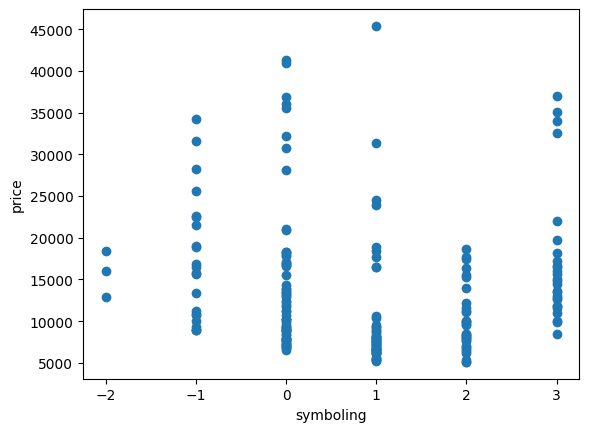

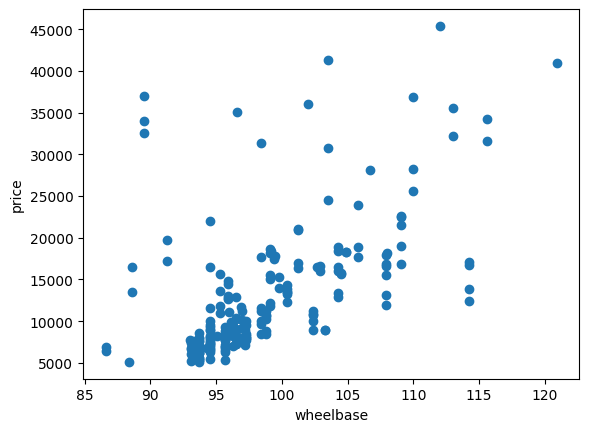

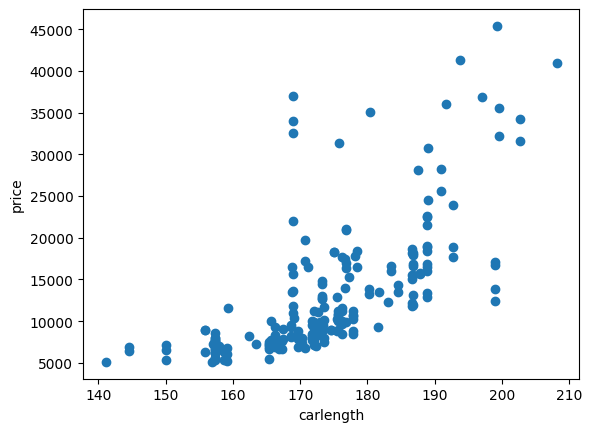

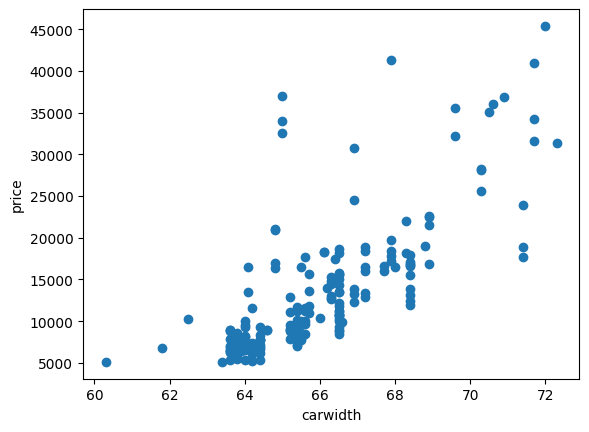

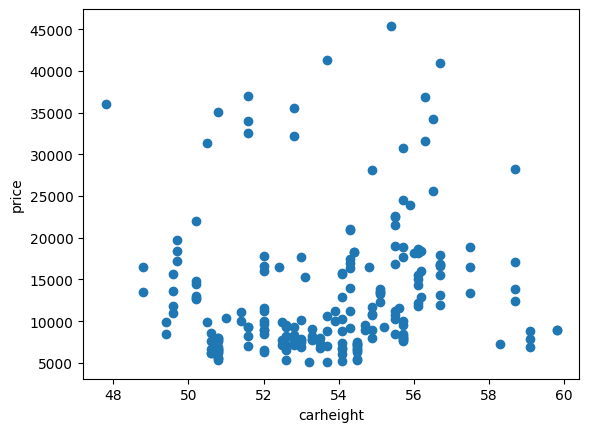

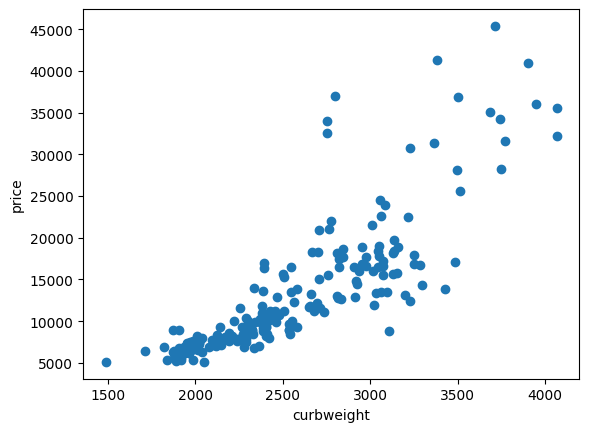

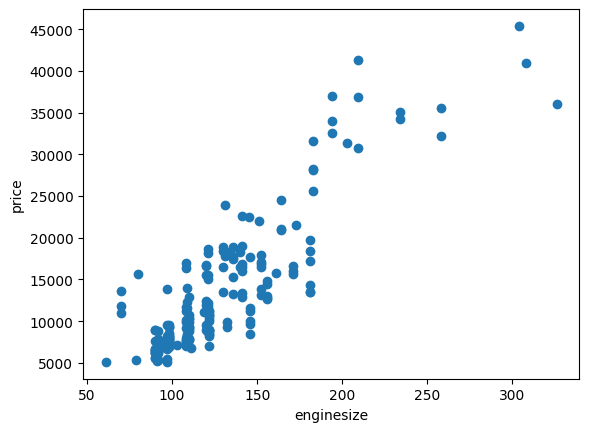

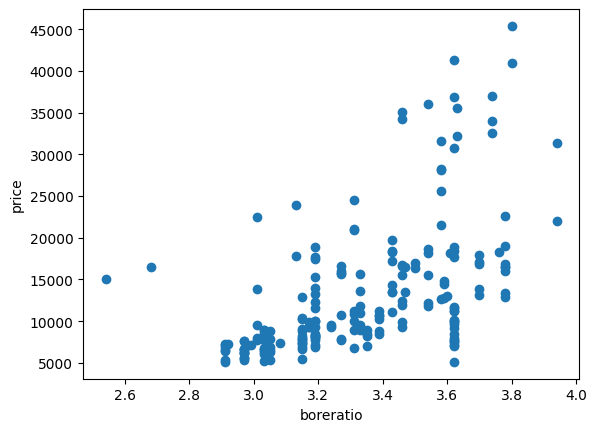

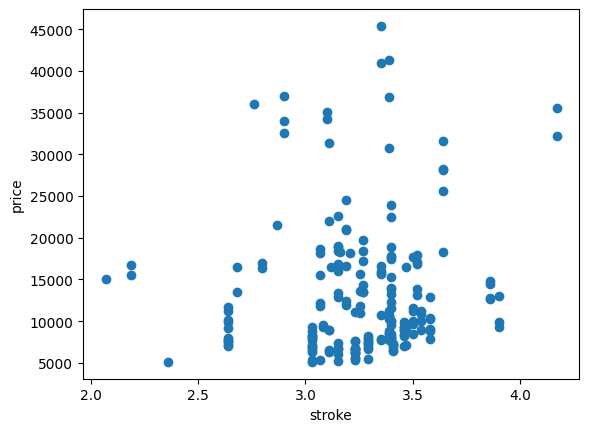

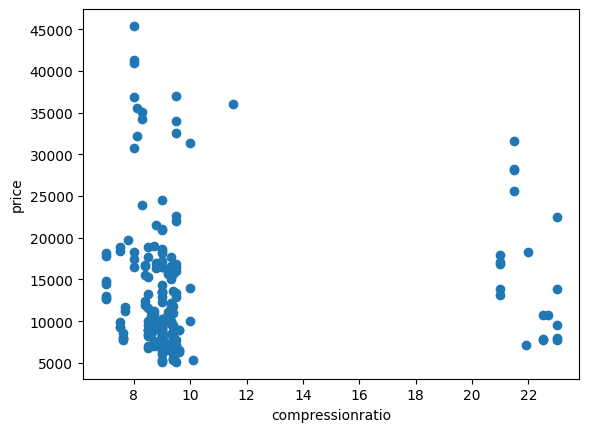

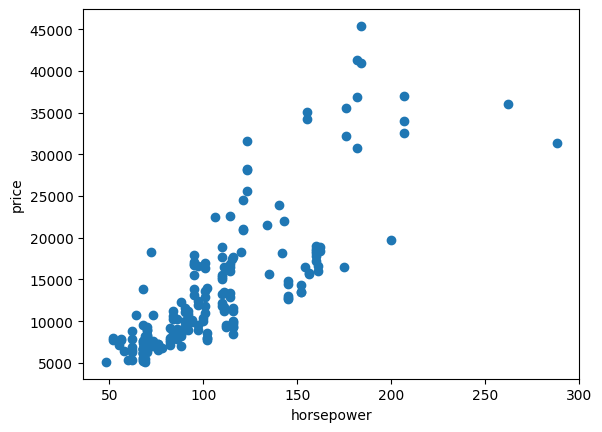

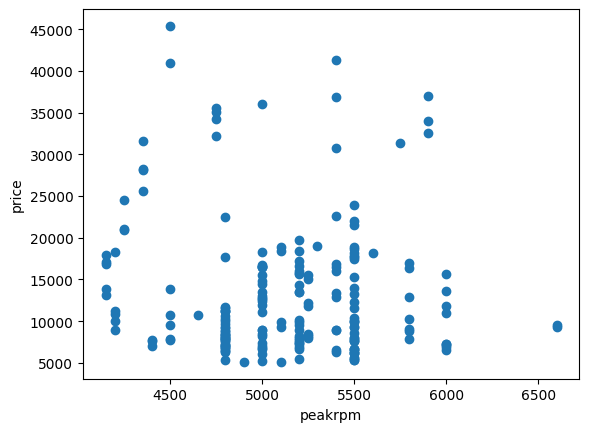

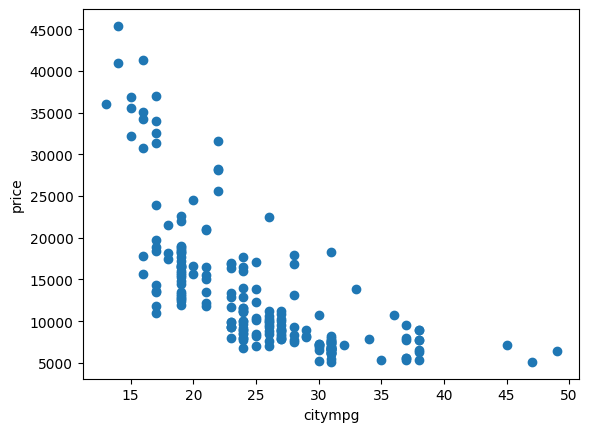

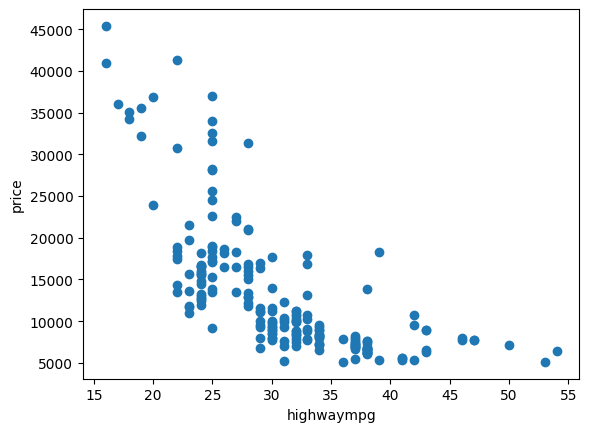

In [4]:
# Scatter plot numerical data to price
for col in data_num.columns[1:-1]:
    plt.scatter(data_num[col], data['price'])
    plt.xlabel(col)
    plt.ylabel('price')
    plt.show()

# Chosen features are:
# 'carwidth', 'curbweight', 'enginesize', 'horsepower'

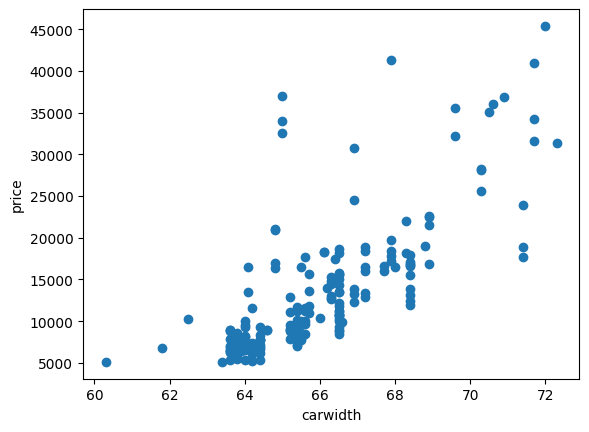

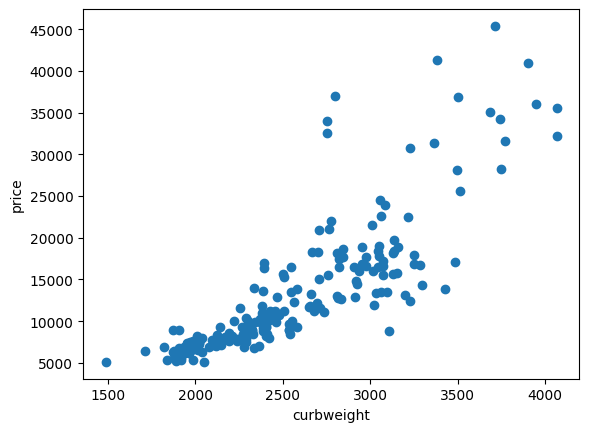

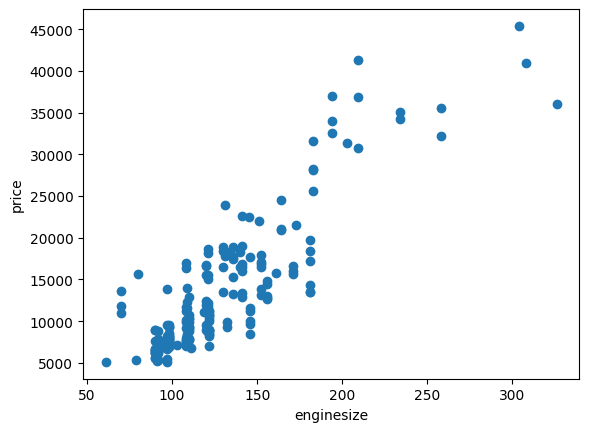

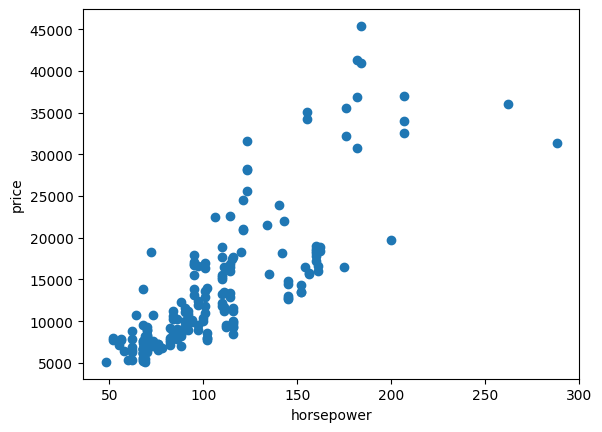

In [5]:
# Plot chosen features
for col in ['carwidth', 'curbweight', 'enginesize', 'horsepower']:
    plt.scatter(data_num[col], data['price'])
    plt.xlabel(col)
    plt.ylabel('price')
    plt.show()

In [6]:
# Get chosen features
data_chosen = data[['carwidth', 'curbweight', 'enginesize', 'horsepower', 'price']]

# Shuffle data
data_chosen = data_chosen.sample(frac=1).reset_index(drop=True)

# Split data into train and test
train = data_chosen[:int(len(data_chosen)*0.8)]
test = data_chosen[int(len(data_chosen)*0.8):]

# Normalize data
train_norm = (train - train.min()) / (train.max() - train.min())
test_norm = (test - test.min()) / (test.max() - test.min())

Iteration: 1, MSE: 248147689.62769905, Test MSE: 176931237.63085327
Iteration: 2, MSE: 217120167.39576256, Test MSE: 152198704.01679817
Iteration: 3, MSE: 190680942.6969202, Test MSE: 131201170.75665727
Iteration: 4, MSE: 168147761.65026277, Test MSE: 113377342.91271435
Iteration: 5, MSE: 148939843.96086517, Test MSE: 98249857.60248503
Iteration: 6, MSE: 132562790.2760427, Test MSE: 85412766.92990392
Iteration: 7, MSE: 118595734.34280367, Test MSE: 74520885.12075624
Iteration: 8, MSE: 106680406.08645357, Test MSE: 65280722.407067575
Iteration: 9, MSE: 96511821.38988826, Test MSE: 57442769.48590638
Iteration: 10, MSE: 87830356.62658392, Test MSE: 50794931.517922886
Iteration: 11, MSE: 80415001.9862284, Test MSE: 45156940.543380484
Iteration: 12, MSE: 74077618.26551354, Test MSE: 40375600.65599991
Iteration: 13, MSE: 68658047.87390476, Test MSE: 36320741.949543245
Iteration: 14, MSE: 64019953.00289959, Test MSE: 32881777.70217432
Iteration: 15, MSE: 60047272.80426358, Test MSE: 29964774.

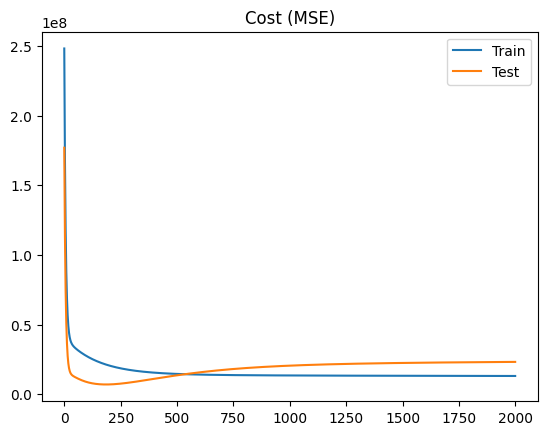

In [7]:
# Linear regression
w = np.random.rand(4)
b = np.random.rand(1)

LEARNING_RATE = .05
ITERATIONS = 2000

cost = []
test_cost = []
# Train
for i in range(ITERATIONS):
    features = train_norm.iloc[:, :-1]

    y_pred = np.dot(features, w) + b
    error = y_pred - train['price']
    w -= LEARNING_RATE * np.dot(error, features) / len(error)
    b -= LEARNING_RATE * error.mean()

    test_features = test_norm.iloc[:, :-1]
    test_y_pred = np.dot(test_features, w) + b
    test_error = test_y_pred - test['price']

    test_cost.append((test_error ** 2).mean())
    cost.append((error ** 2).mean())
    print('Iteration: {}, MSE: {}, Test MSE: {}'.format(i + 1, cost[-1], test_cost[-1]))

# Plot cost
plt.plot(cost)
plt.plot(test_cost)
plt.legend(['Train', 'Test'])
plt.title('Cost (MSE)')
plt.show()

In [8]:
w

array([ 6571.2807198 , 10056.54472772, 15209.74288268, 13826.91269207])

In [9]:
b

array([-889.70150999])